In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

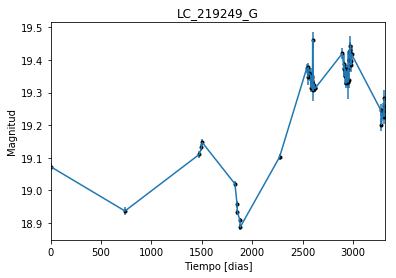

In [2]:
data = np.genfromtxt('LC_219249_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_219249_G')
plt.savefig("LC_219249_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

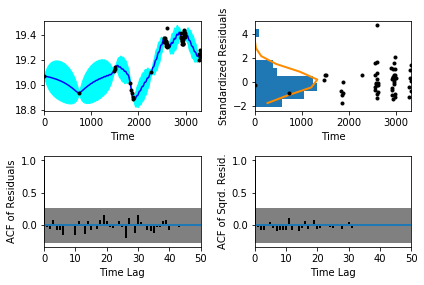

In [5]:
sample.assess_fit()

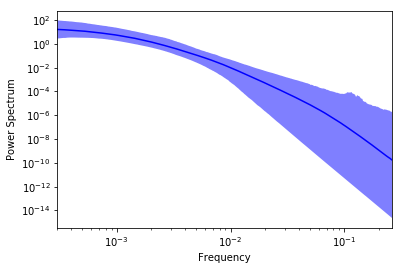

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

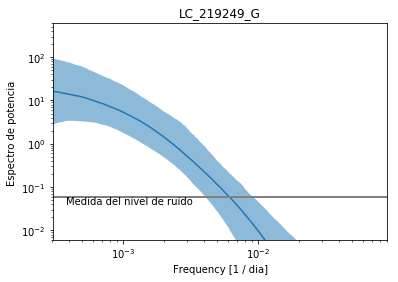

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_219249_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_219249_G')

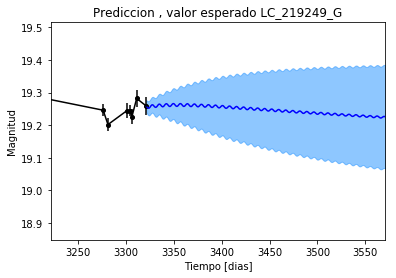

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_219249_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_219249_G')

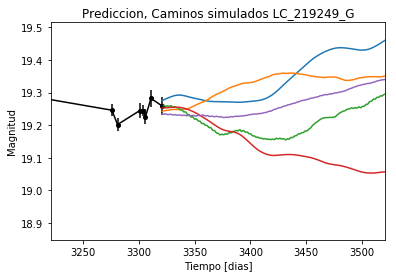

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_219249_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


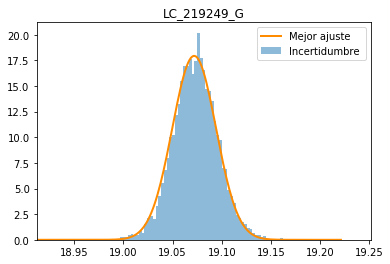

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_219249_G')
plt.savefig("Mejor_ajuste_LC_219249_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_219249_G')

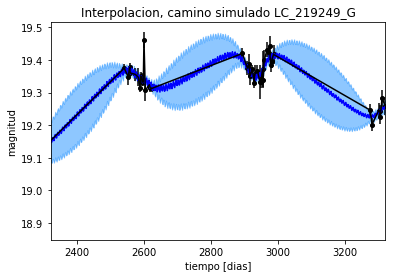

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_219249_G')

Text(0.5,1,'Interpolacion, camino simulado  LC_219249_G')

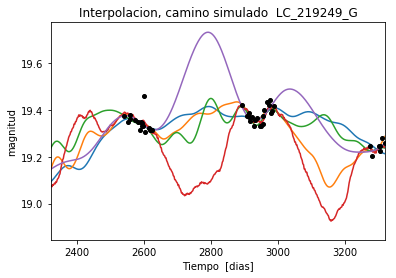

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_219249_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 390.860987863
Median: 0.0117169738124
Standard deviation: 0.108040869332
68% credibility interval: [ 0.00124879  0.14525903]
95% credibility interval: [  3.61069934e-04   3.98432626e-01]
99% credibility interval: [  3.24797207e-04   4.92441323e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 895.032206842
Median: 0.00234861308781
Standard deviation: 0.0437780041596
68% credibility interval: [ 0.00049629  0.01633948]
95% credibility interval: [ 0.00033345  0.14007469]
99% credibility interval: [  3.10404813e-04   3.30505996e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 305.252505204
Median: 0.012776004884
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1585.10578939
Median: 114.965387719
Standard deviation: 1.76971408513
68% credibility interval: [ 112.98051076  116.33180706]
95% credibility interval: [ 110.47161583  117.06641573]
99% credibility interval: [ 108.37470334  117.69417149]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 840.002835134
Median: 0.50143079945
Standard deviation: 1.10334302897
68% credibility interval: [ 0.06352051  2.06403583]
95% credibility interval: [ 0.01767449  3.71082172]
99% credibility interval: [ 0.01033629  5.48010986]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 283.127201144
Median: 0.163834540668
Standard deviation: 2.29678045527
68% credibility interval: [ 0.01005758  1.95177515]
95% credibility interval: [  1.33217880e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3020.28505931
Median: 1.4425943927e-33
Standard deviation: 2.09764357427e+149
68% credibility interval: [  4.96135794e-74   8.44117204e-03]
95% credibility interval: [  2.17566517e-113   8.94364590e+068]
99% credibility interval: [  9.29960124e-130   1.19567027e+145]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 930.755845986
Median: 19.14775553
Standard deviation: 0.0956942288721
68% credibility interval: [ 19.05883386  19.2265888 ]
95% credibility interval: [ 18.94795749  19.32558952]
99% credibility interval: [ 18.85420218  19.43118322]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 665.277488908
Median: 0.0027527725118
Standard deviation: 0.12226317166
68% credibility interval: [ 0.          0.15529624]
95% credibility interval: [ 0.          0.45020142]
99% credibility interval: [ 0.          0.51435183]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 665.277488908
Median: 0.0027527725118
Standard deviation: 0.12226317166
68% credibility interval: [ 0.          0.15529624]
95% credibility interval: [ 0.          0.45020142]
99% credibility interval: [ 0.          0.51435183]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 932.687549217
Median: 0.0
Standard deviation: 0.000388922589496
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1585.10578939
Median: 114.965387719
Standard deviation: 1.76971408513
68% credibility interval: [ 112.98051076  116.33180706]
95% credibility interval: [ 110.47161583  117.06641573]
99% credibility interval: [ 108.37470334  117.69417149]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 863.878545685
Median: 0.0367322644408
Standard deviation: 0.0447032234168
68% credibility interval: [ 0.02168091  0.07031373]
95% credibility interval: [ 0.01463579  0.15365852]
99% credibility interval: [ 0.01147802  0.27148293]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1316.95816763
Median: 1.29682354197
Standard deviation: 0.210360564273
68% credibility interval: [ 1.10425508  1.52064878]
95% credibility interval: [ 0.95636161  1.77718223]
99% credibility interval: [ 0.85927776  1.91791203]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 520.639144541
Median: 5.95115559289e-05
Standard deviation: 0.0046163841258
68% credibility interval: [  8.38559979e-07   1.05503968e-03]
95% credibility interval: [  2.89865361e-73   6.95140462e-03]
99% credibility interval: [  2.88847399e-149   2.96269534e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 390.860987863
Median: (-0.0736199177028-0.0142205043223j)
Standard deviation: 1.02516310894
68% credibility interval: [-0.91268939+0.j         -0.00784637-0.28888798j]
95% credibility interval: [ -2.50342602e+00+0.j         -2.26866930e-03-1.0469856j]
99% credibility interval: [ -3.09410009e+00+0.j         -2.04076104e-03-0.0020814j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 895.032206842
Median: (-0.0147567712456+0j)
Standard deviation: 0.815962922314
68% credibility interval: [-0.10266396+0.j        -0.00311831+0.0490128j]
95% credibility interval: [-0.88011524+0.35196342j -0.00209513+0.j        ]
99% credibility interval: [ -2.07663042e+00+2.10330717j  -1.95033096e-03+0.j        ]
Posterior summary for paramet